In [1]:
#Initialized with the values N and a.
#N: number of segments
#a:segment length


In [9]:
import math 
import random

class Polymer:
    def __init__(self,N,a):
        """A class representing a random flight polymer in solution"""
        
        self.N=N
        self.a=a
        self.xyz=[(None, None, None)]*N
        self.R=None
        self.make_polymer()
        
    def make_polymer(self):
        self.xyz[0]=x,y,z=cx,cy,cz=0,0,0
        for i in range(1,self.N):
            #Random orientation for the next segment
            theta=math.acos(2*random.random()-1)
            phi=random.random()*2.0*math.pi
            x+=self.a*math.sin(theta)*math.cos(phi)
            y+=self.a*math.sin(theta)*math.sin(phi)
            z+=self.a*math.cos(theta)
            self.xyz[i]=x,y,z
            cx,cy,cz=cx+x, cy+y,cz+z
        #center of mass position
        cx,cy,cz=cx/self.N, cy/self.N, cz/self.N
        self.R=x,y,z
        for i in range(self.N):
            self.xyz[i]=(self.xyz[i][0]-cx, self.xyz[i][1]-cy, self.xyz[i][2]-cz)
            
    def calc_Rg(self):
        self.Rg=0
        for x,y,z in self.xyz:
            self.Rg+=x**2+y**2+z**2
        self.Rg=math.sqrt(self.Rg/self.N)
        return self.Rg

In [10]:
polymer=Polymer(1000,0.5)
polymer.R

(-7.105697547941038, 6.5986689651483275, -10.72833418754878)

In [11]:
polymer.calc_Rg()

5.21981077728996

In [17]:
import matplotlib.pyplot as plt
import numpy as np
pi=np.pi

In [18]:
Np=3000
N,a=1000,1
R=[None]*Np

100 / 3000
200 / 3000
300 / 3000
400 / 3000
500 / 3000
600 / 3000
700 / 3000
800 / 3000
900 / 3000
1000 / 3000
1100 / 3000
1200 / 3000
1300 / 3000
1400 / 3000
1500 / 3000
1600 / 3000
1700 / 3000
1800 / 3000
1900 / 3000
2000 / 3000
2100 / 3000
2200 / 3000
2300 / 3000
2400 / 3000
2500 / 3000
2600 / 3000
2700 / 3000
2800 / 3000
2900 / 3000
3000 / 3000


(array([0.00065685, 0.00109475, 0.00240845, 0.00459796, 0.00613061,
        0.00678746, 0.01029067, 0.01379388, 0.02014344, 0.01817289,
        0.02583615, 0.02364665, 0.02714985, 0.03371837, 0.03678367,
        0.03043411, 0.03262361, 0.03130991, 0.03196676, 0.02868251,
        0.02999621, 0.0256172 , 0.0234277 , 0.02255189, 0.02233294,
        0.01817289, 0.02036239, 0.01335598, 0.01576443, 0.01269913,
        0.01007172, 0.01029067, 0.00919592, 0.00569271, 0.00678746,
        0.00328426, 0.00350321, 0.00394111, 0.0021895 , 0.00328426,
        0.00065685, 0.00153265, 0.0013137 , 0.0021895 , 0.0013137 ,
        0.00021895, 0.        , 0.0004379 , 0.00021895, 0.00021895]),
 array([ 0.50538829,  2.02780286,  3.55021743,  5.072632  ,  6.59504657,
         8.11746115,  9.63987572, 11.16229029, 12.68470486, 14.20711943,
        15.729534  , 17.25194857, 18.77436314, 20.29677771, 21.81919229,
        23.34160686, 24.86402143, 26.386436  , 27.90885057, 29.43126514,
        30.95367971, 32.47

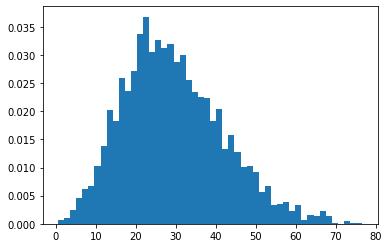

In [20]:
for i in range (Np):
    polymer=Polymer(N,a)
    Rx,Ry,Rz=polymer.R
    R[i]=math.sqrt(Rx**2+ Ry**2+Rz**2)
    if not (i+1)%100:
        print(i+1,'/',Np)

plt.hist(R,50,density=1)

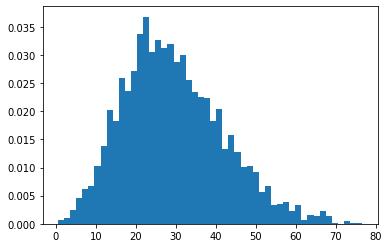

In [22]:
plt.hist(R,50,density=1)
plt.savefig('Polymers.pdf')

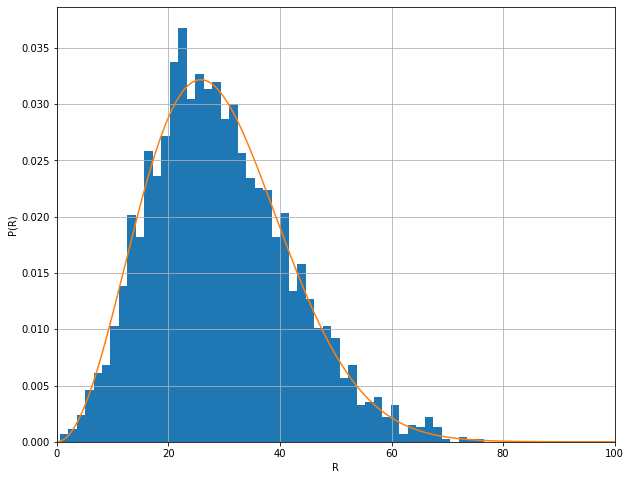

In [31]:
plt.figure(figsize=(10,8))
plt.hist(R,50,density=1)
r=np.linspace(0,200,1000)
msr=N*a**2
Pr=4.0*pi*r**2*(2*pi*msr/3)**(-1.5)*np.exp(-3*r**2/2/msr)
plt.plot(r,Pr)
plt.xlim(0,100)
plt.xlabel('R')
plt.ylabel('P(R)')
plt.grid()
plt.savefig("hist1.pdf")